In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import pandas as pd
df_train = pd.read_csv("train.csv")

In [5]:
df_train.head(1)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500

[1 rows x 81 columns]

PREPROCESSING USING NONE

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [8]:
df_train.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
df_train.shape

(1460, 81)

In [9]:
total = df_train.isna().sum().sort_values(ascending=False)
percent = (df_train.isna().sum()/df_train.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000
YearRemodAdd      0  0.000000
MSSubClass        0  0.000000
Foundation        0  0.000000
ExterCond         0  0.000000
ExterQual         0  0.000000

In [10]:
print(f"df_train.shape -> {df_train.shape}")
df_train = df_train.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)
print(f"df_train.shape -> {df_train.shape}")

df_train.shape -> (1460, 81)
df_train.shape -> (1460, 75)


In [11]:
object_columns_df = df_train.select_dtypes(include=['object'])
object_columns_df.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [12]:
columns_None = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','Electrical','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
object_columns_df[columns_None]= object_columns_df[columns_None].fillna('None')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in object_columns_df.columns:
    object_columns_df[''+x+''] = le.fit_transform(object_columns_df[''+x+''])
#  break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
object_columns_df.head(1)

MSZoning  Street  LotShape  ...  PavedDrive  SaleType  SaleCondition
0         3       1         3  ...           2         8              4

[1 rows x 38 columns]

In [15]:
object_columns_df['SalePrice'] = df_train['SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
object_columns_df

MSZoning  Street  LotShape  ...  SaleType  SaleCondition  SalePrice
0            3       1         3  ...         8              4     208500
1            3       1         3  ...         8              4     181500
2            3       1         0  ...         8              4     223500
3            3       1         0  ...         8              0     140000
4            3       1         0  ...         8              4     250000
...        ...     ...       ...  ...       ...            ...        ...
1455         3       1         3  ...         8              4     175000
1456         3       1         3  ...         8              4     210000
1457         3       1         3  ...         8              4     266500
1458         3       1         3  ...         8              4     142125
1459         3       1         3  ...         8              4     147500

[1460 rows x 39 columns]

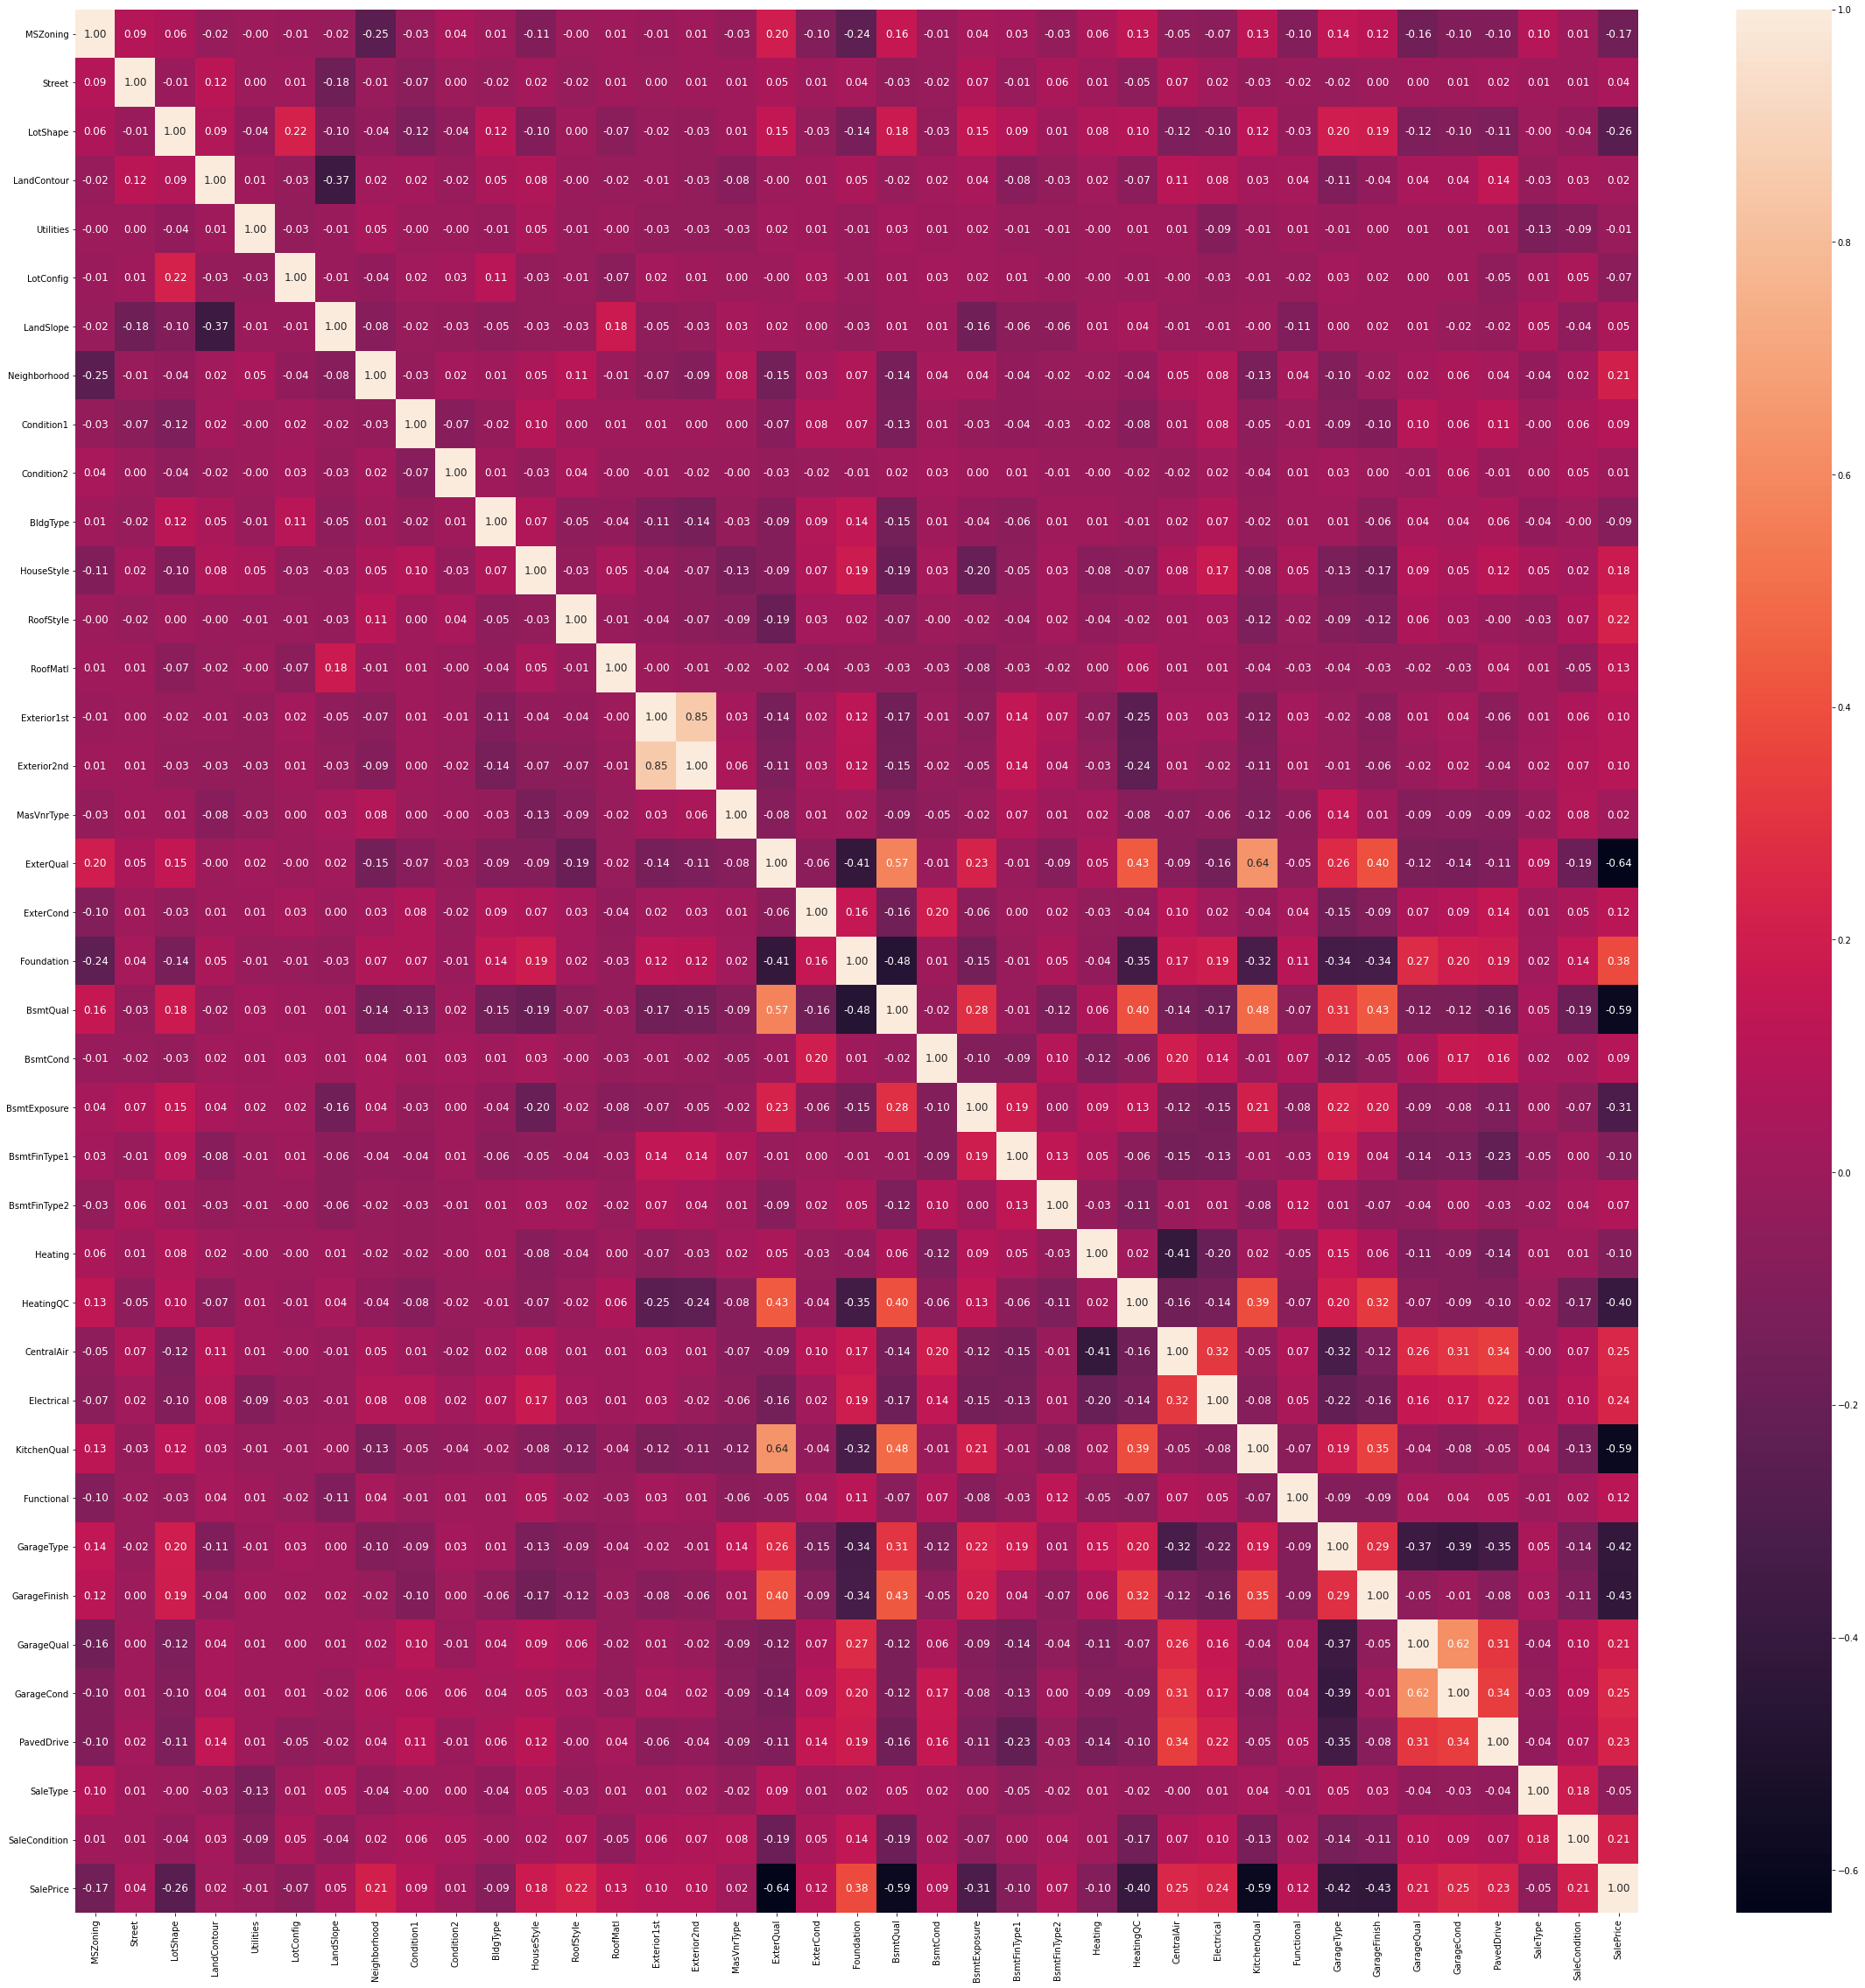

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40)) 
sns.heatmap(object_columns_df.corr(),annot_kws={'size': 12},fmt='.2f',annot=True)

In [18]:
object_columns_df.shape

(1460, 39)

In [19]:
# object_columns_df = object_columns_df.drop(['MSZoning', 'Street', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
#        'Heating', 'Functional', 'SaleType'], axis = 1)

In [20]:
# object_columns_df.drop([''], axis = 1)
object_columns_df.shape

(1460, 39)

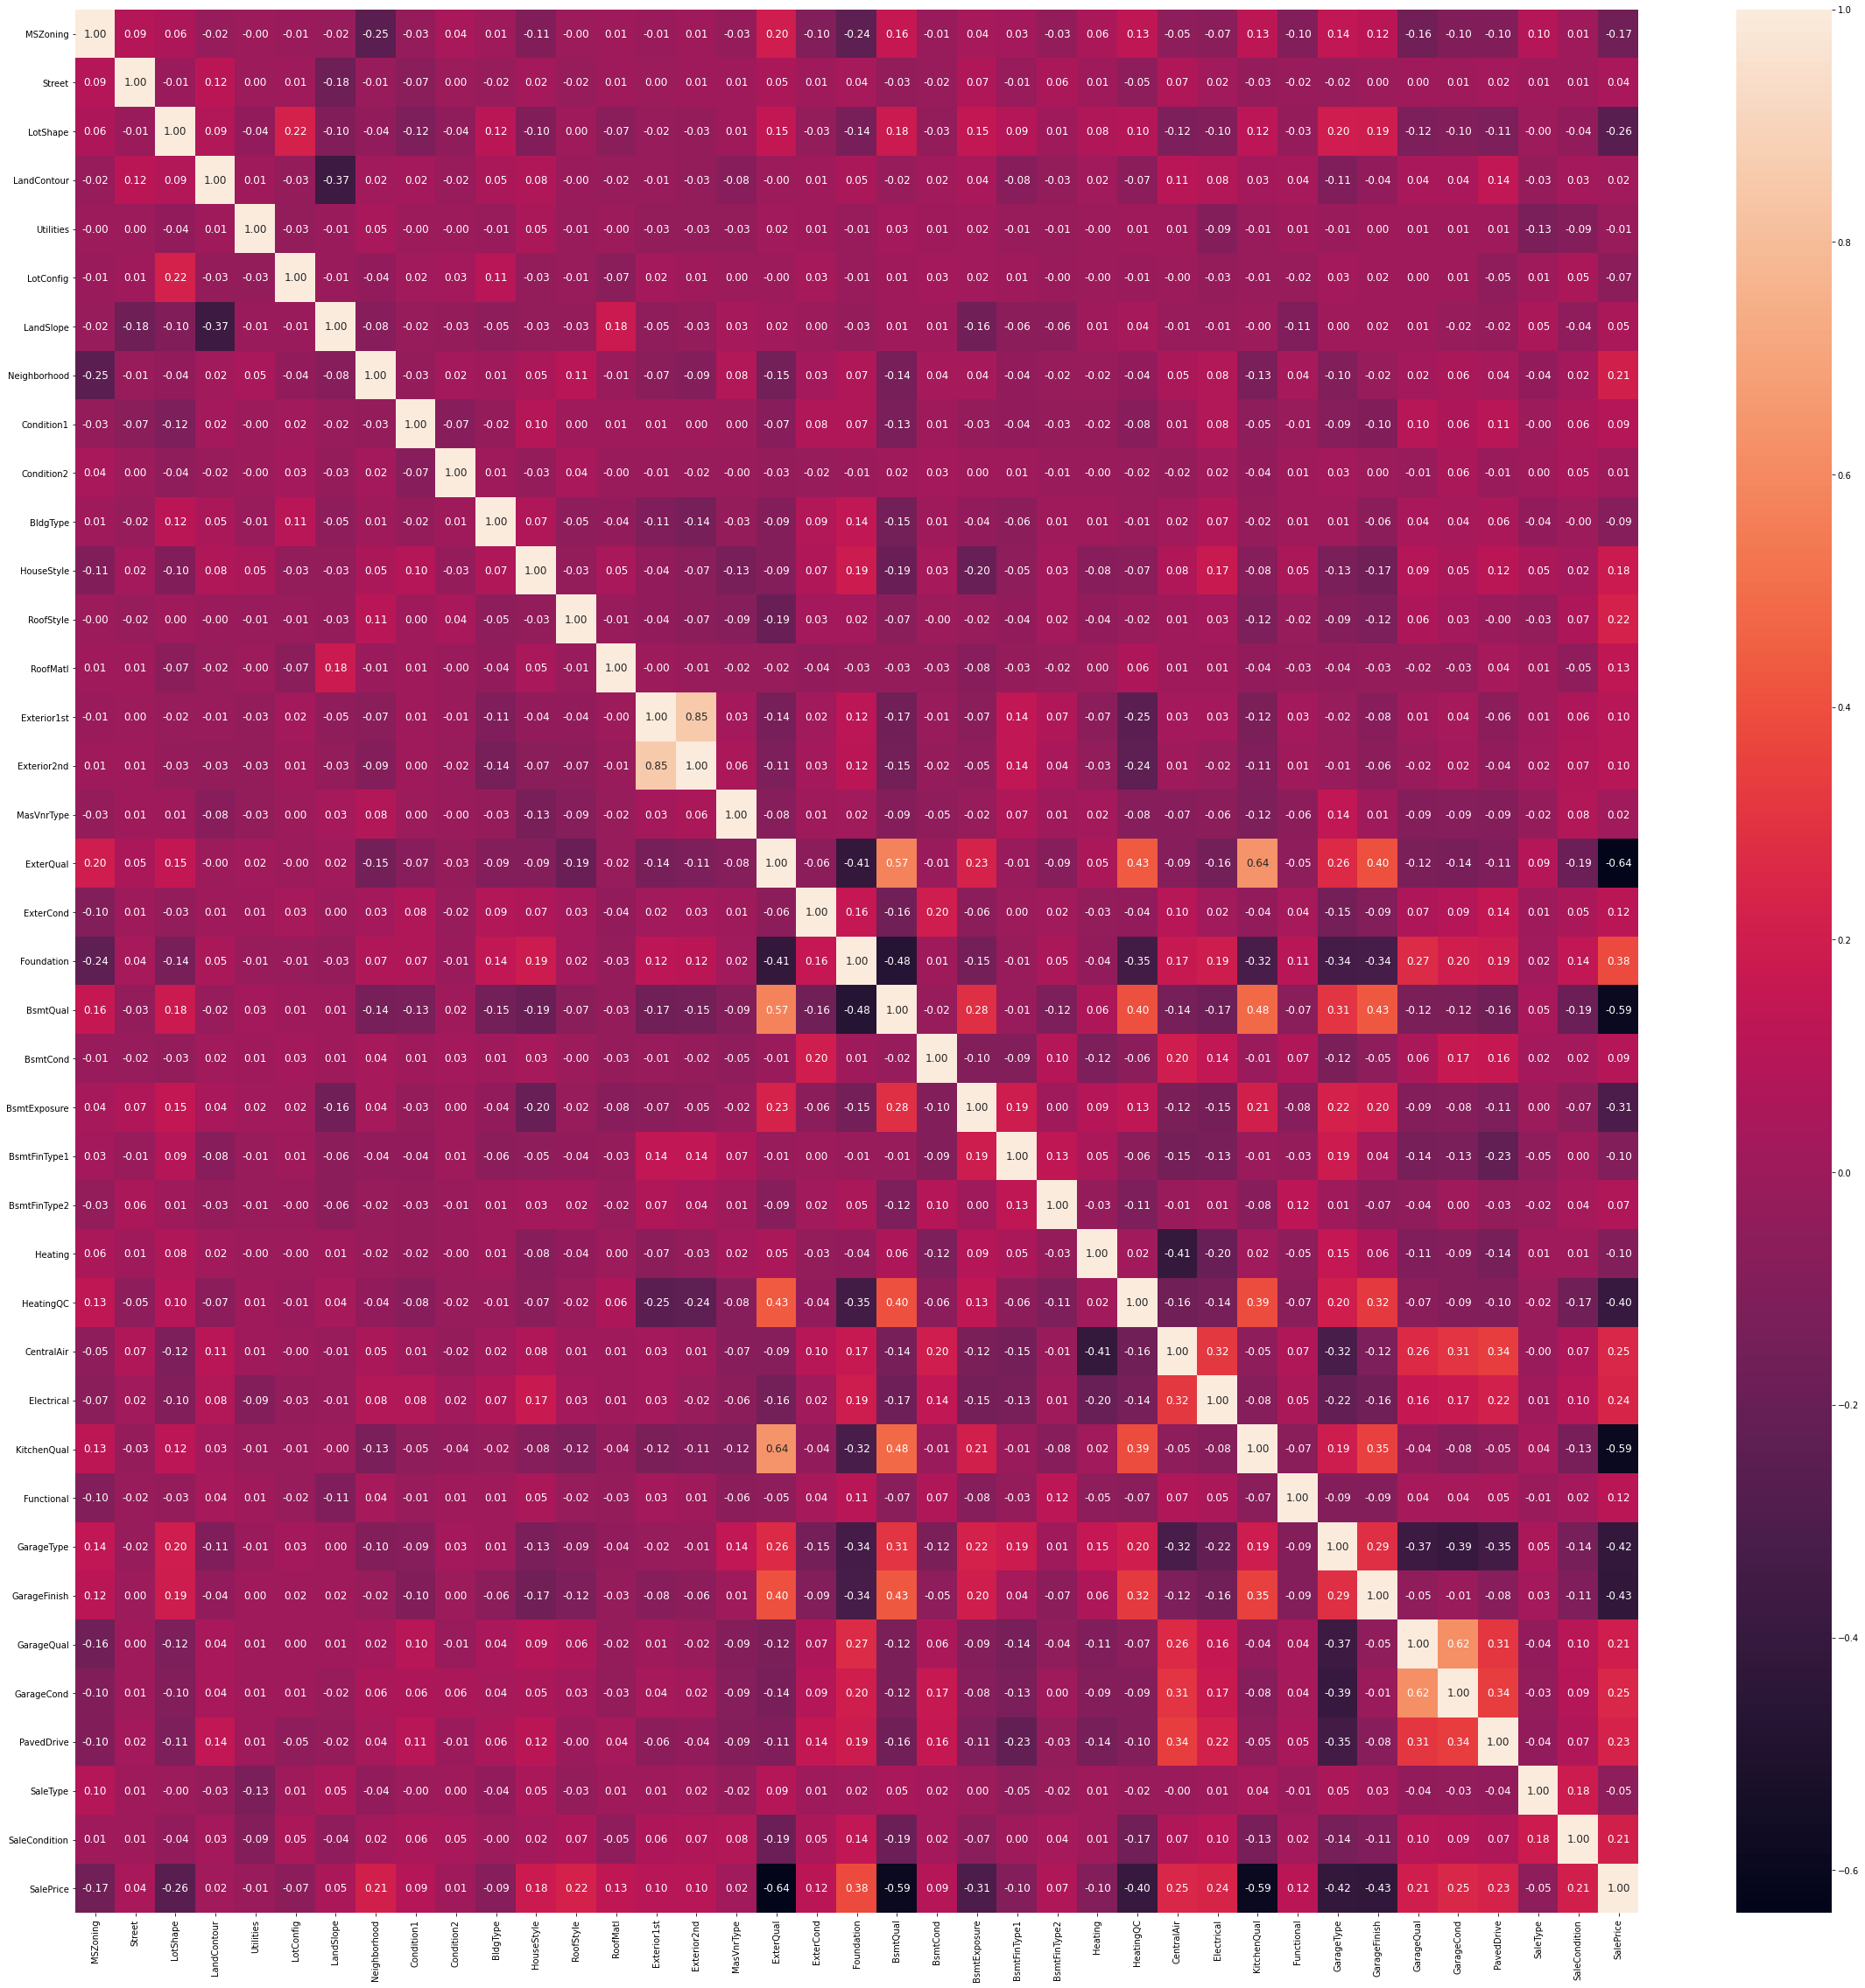

In [21]:
plt.figure(figsize=(40,40)) 
sns.heatmap(object_columns_df.corr(),annot_kws={'size': 12},fmt='.2f',annot=True)

In [22]:
object_columns_df = object_columns_df.drop(['SalePrice'], axis = 1)

In [23]:
numerical_columns_df =df_train.select_dtypes(exclude=['object'])
numerical_columns_df.isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

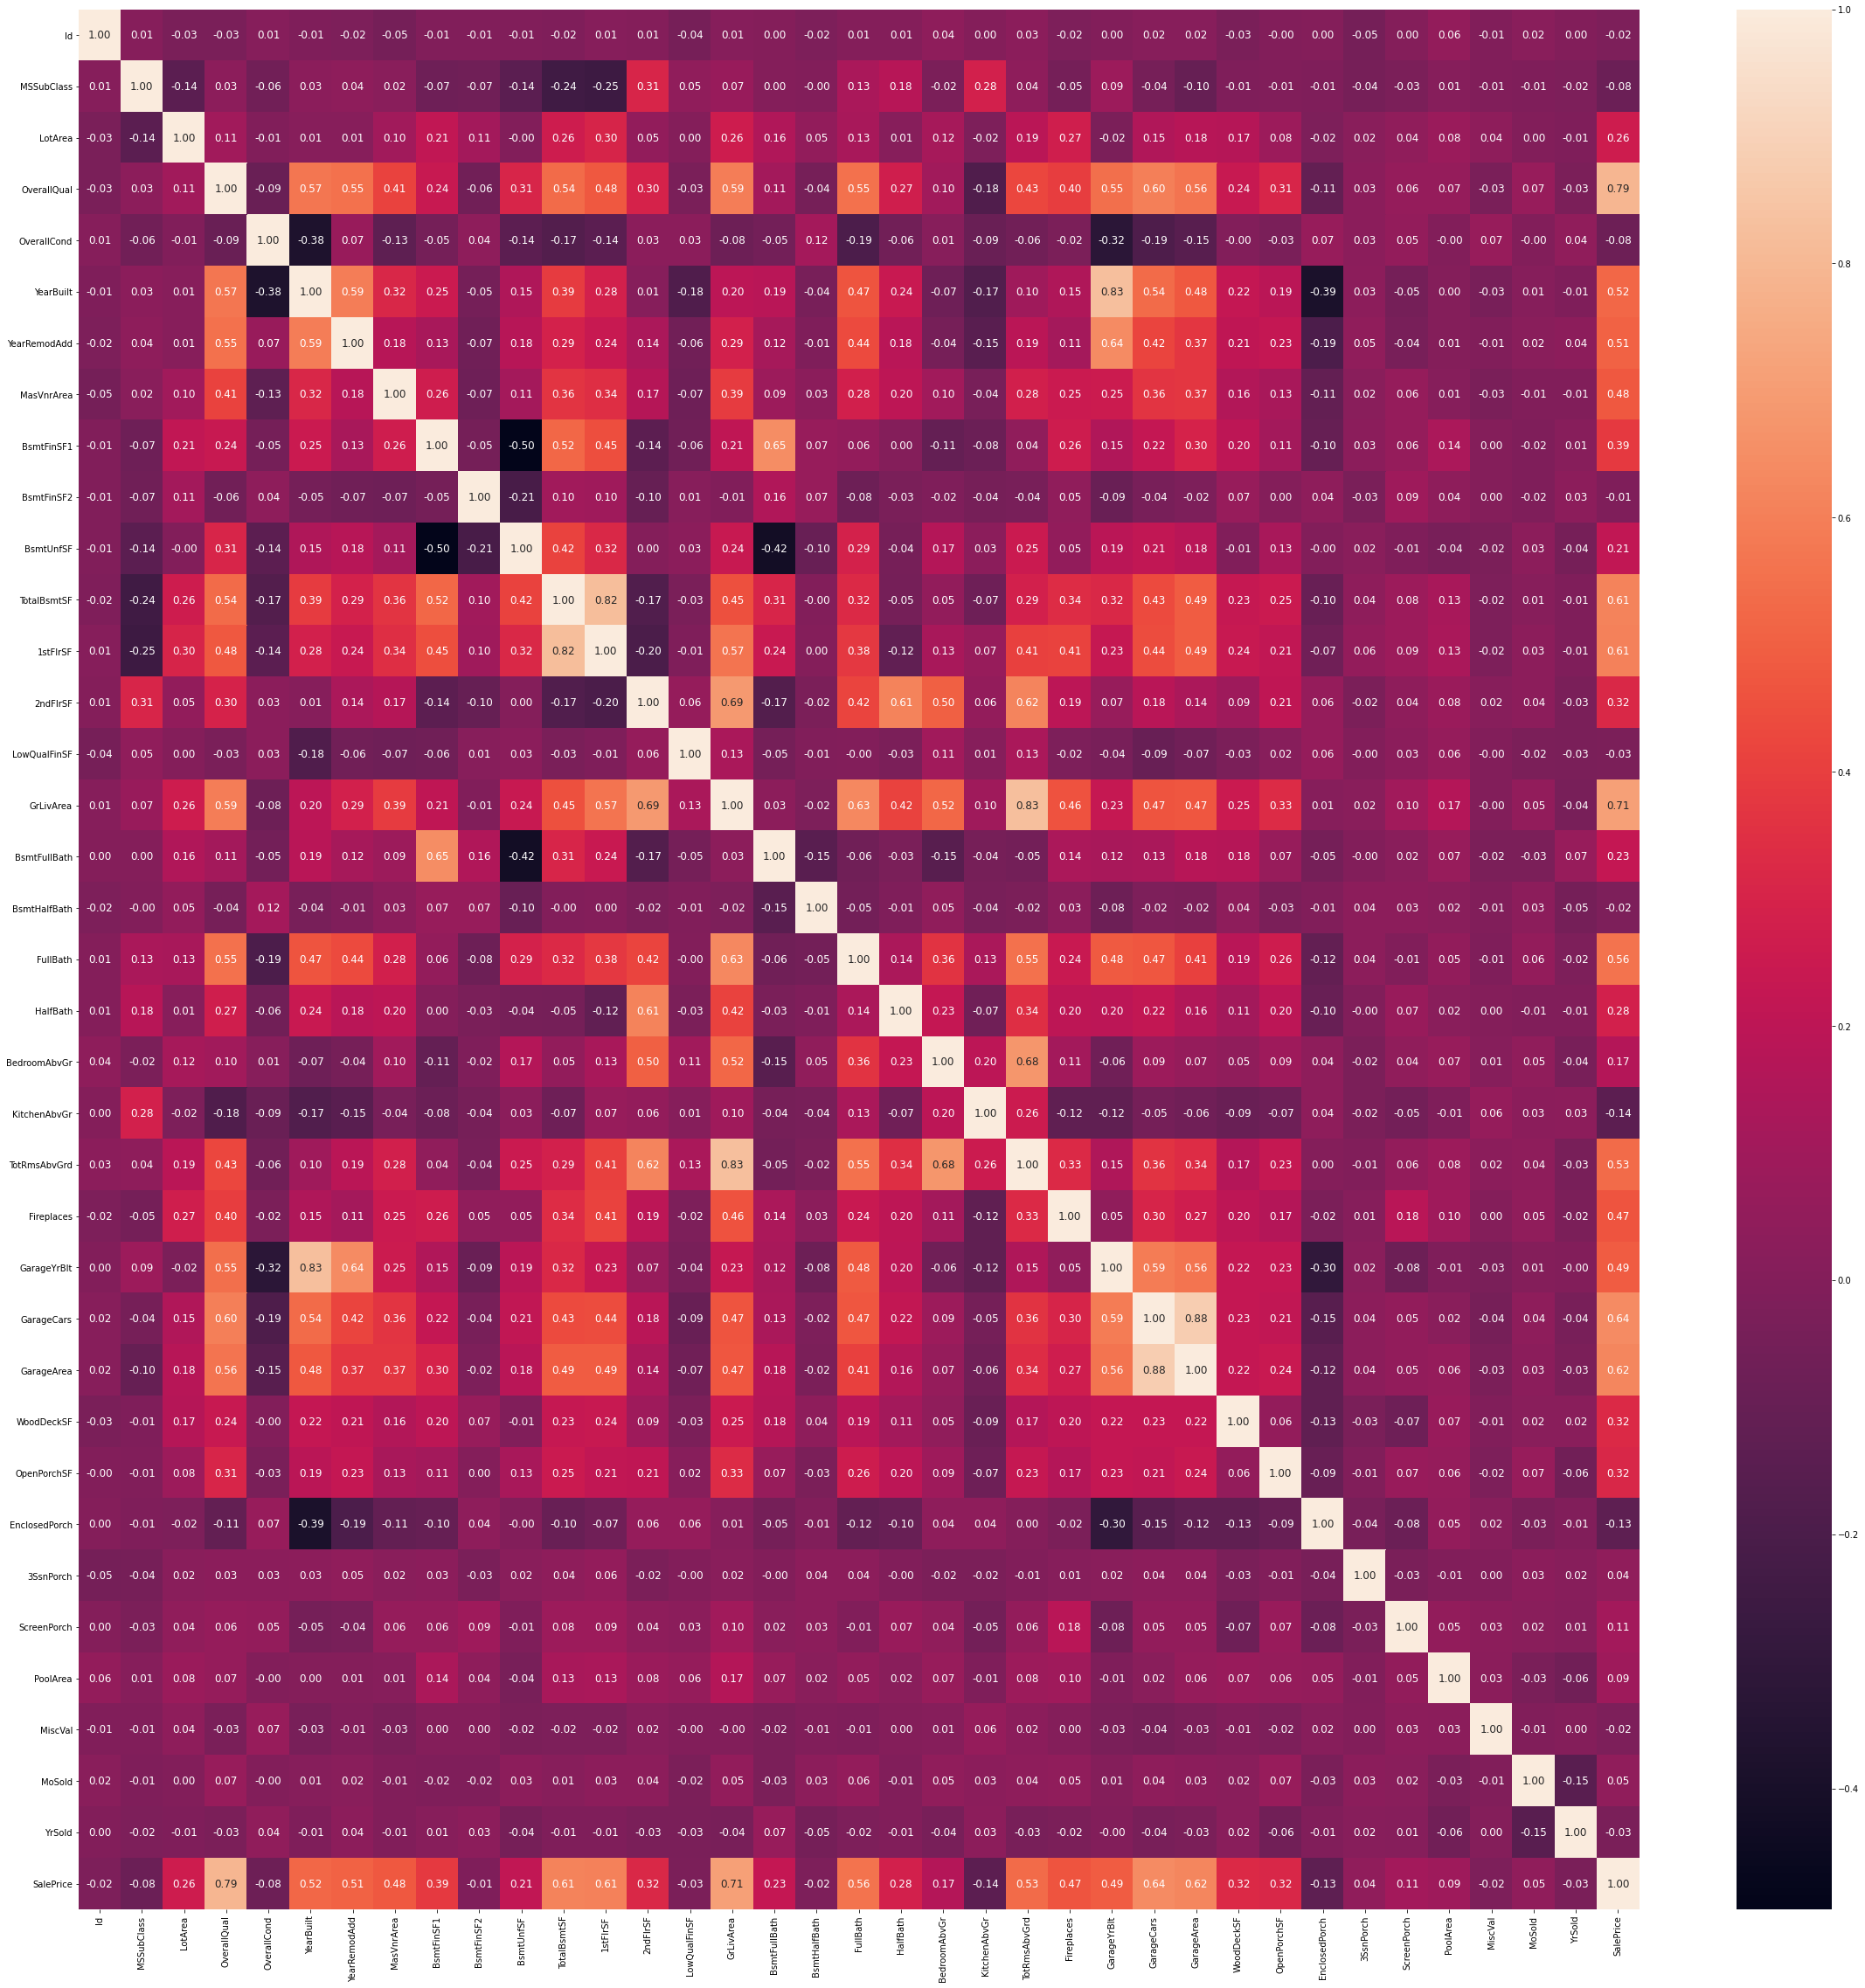

In [24]:
plt.figure(figsize=(40,40)) 
sns.heatmap(numerical_columns_df.corr(),annot_kws={'size': 12},fmt='.2f',annot=True)

In [25]:
# numerical_columns_df = numerical_columns_df.drop(['Id','MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','3SsnPorch','PoolArea','MiscVal','MoSold','YrSold'], axis = 1)
# #df.drop(['A'], axis = 1)

In [26]:
numerical_columns_df.shape

(1460, 37)

In [27]:
df_concat = pd.concat([object_columns_df, numerical_columns_df], axis=1)

df_concat.shape

(1460, 75)

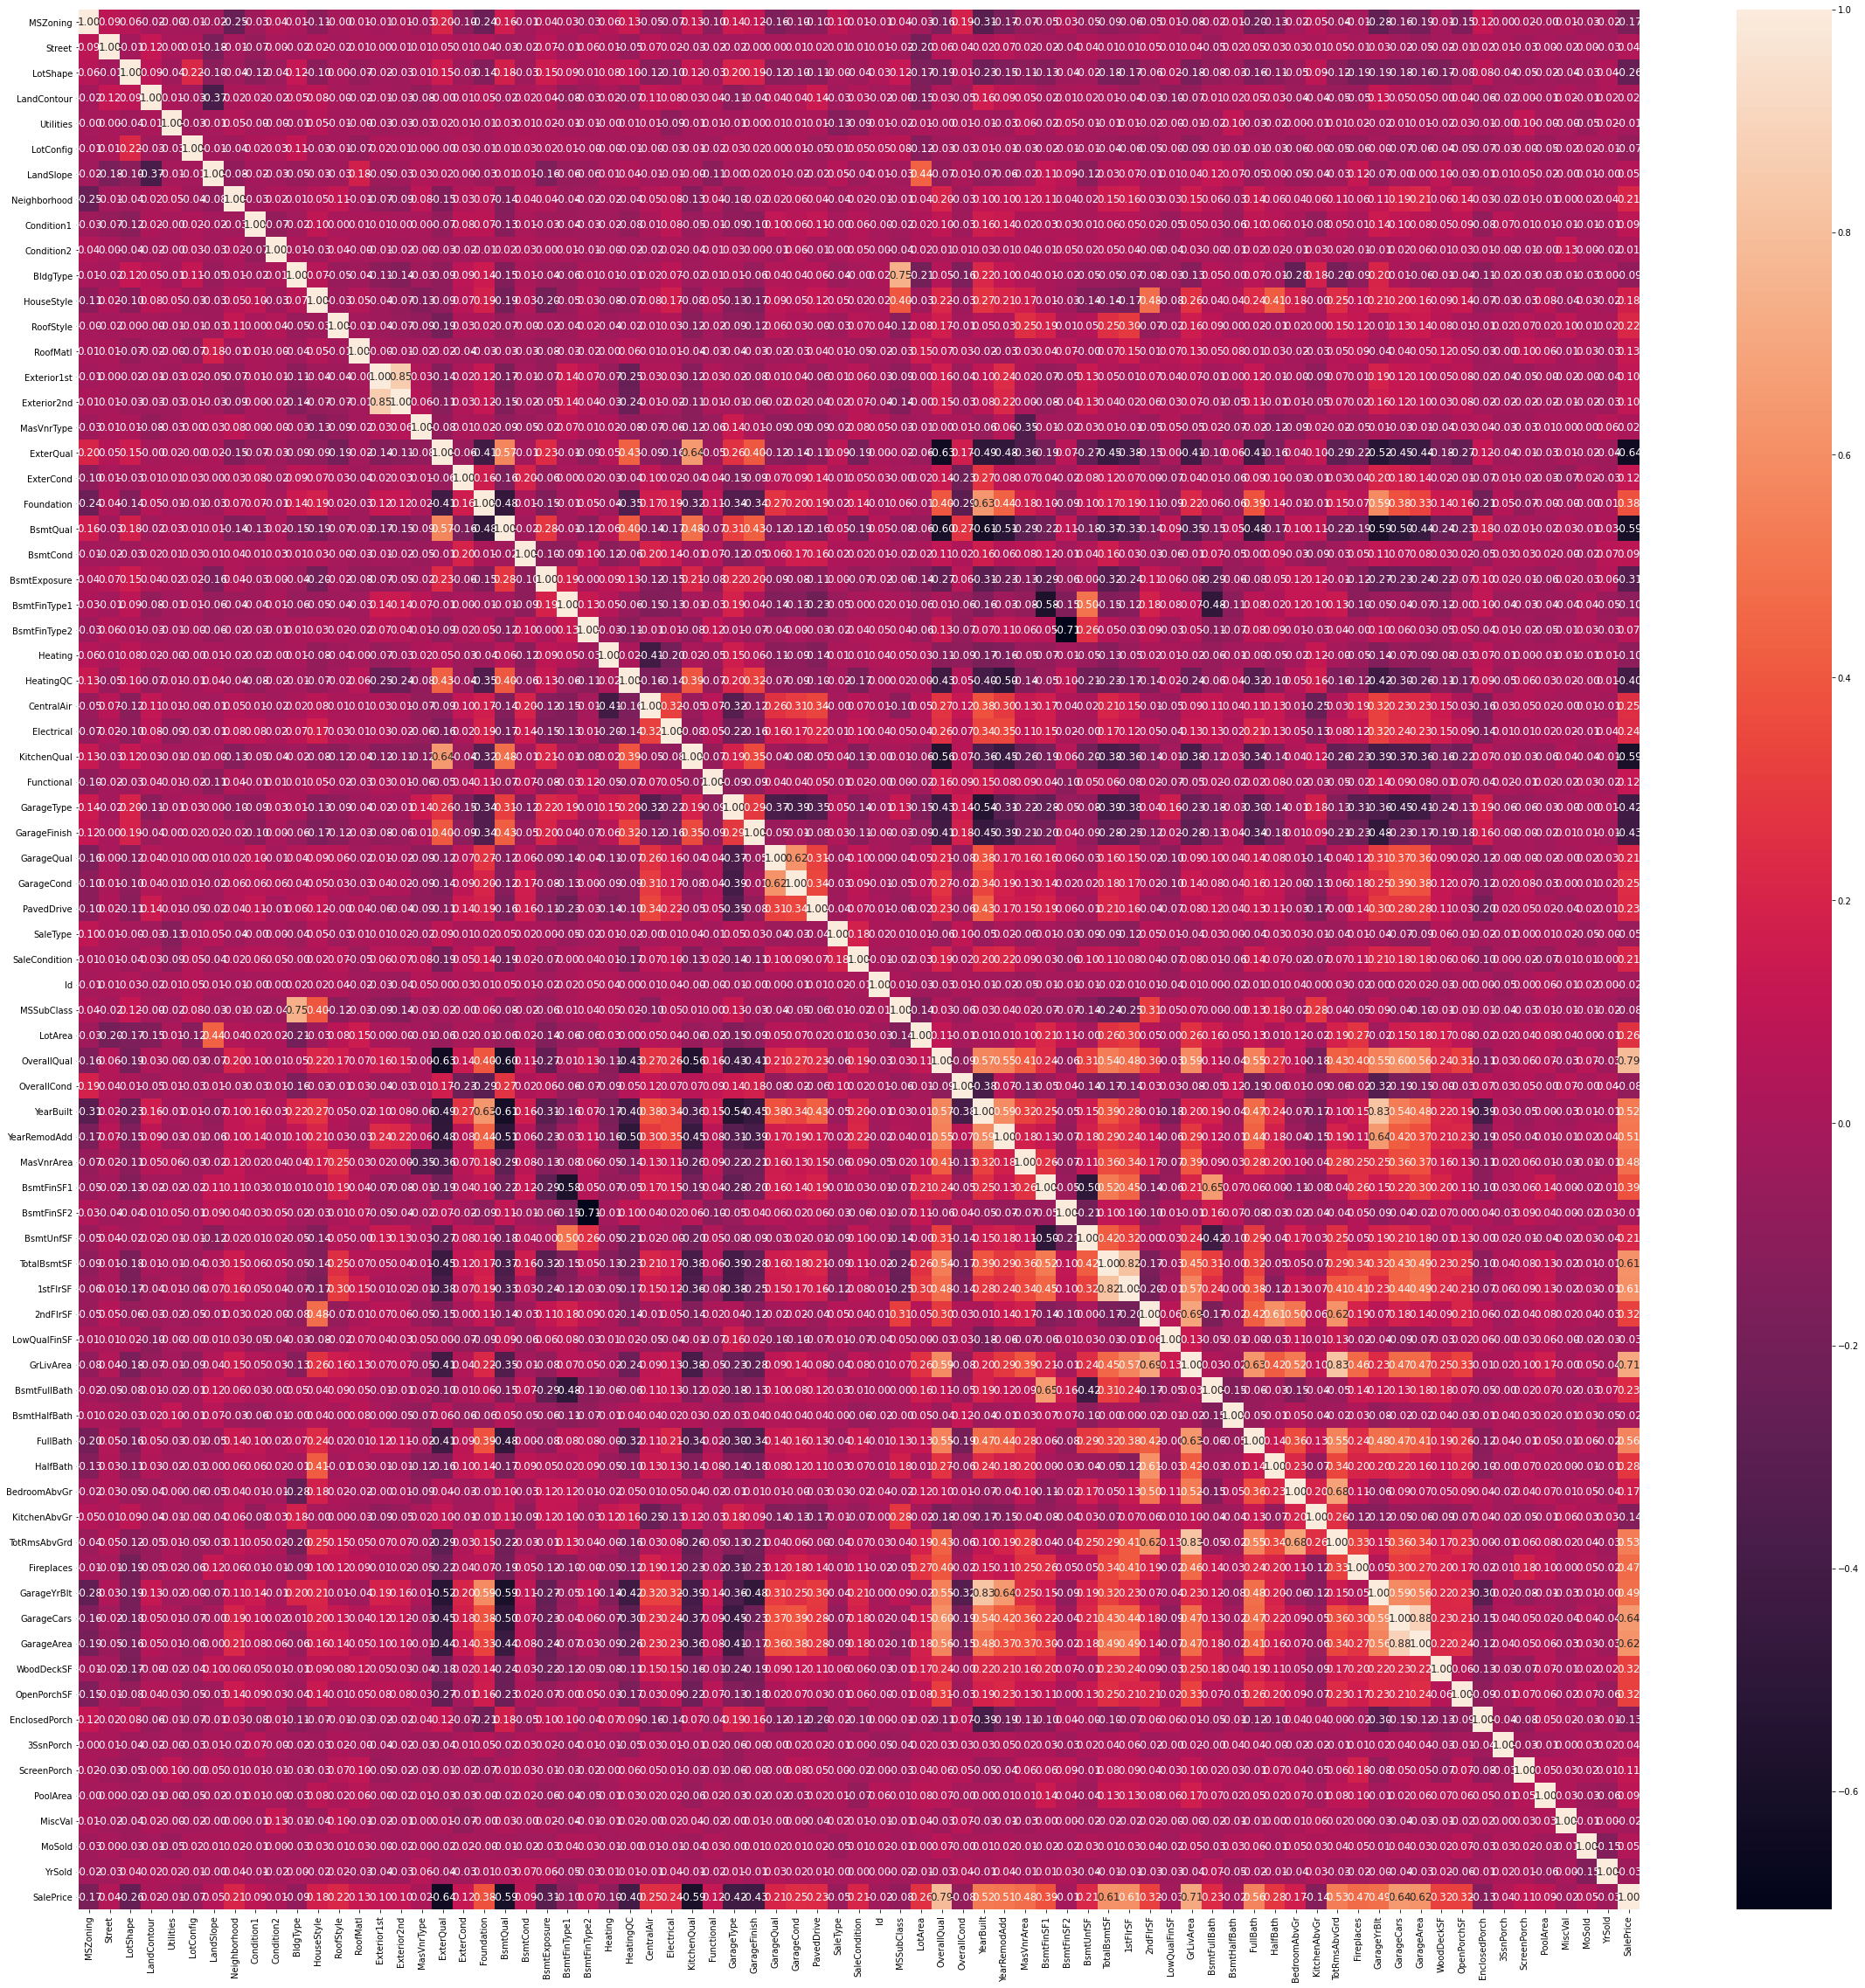

In [28]:
plt.figure(figsize=(40,40)) 
sns.heatmap(df_concat.corr(),annot_kws={'size': 12},fmt='.2f',annot=True)

In [29]:
# df_concat = df_concat.drop(['BedroomAbvGr','KitchenAbvGr','EnclosedPorch','ScreenPorch'], axis = 1)

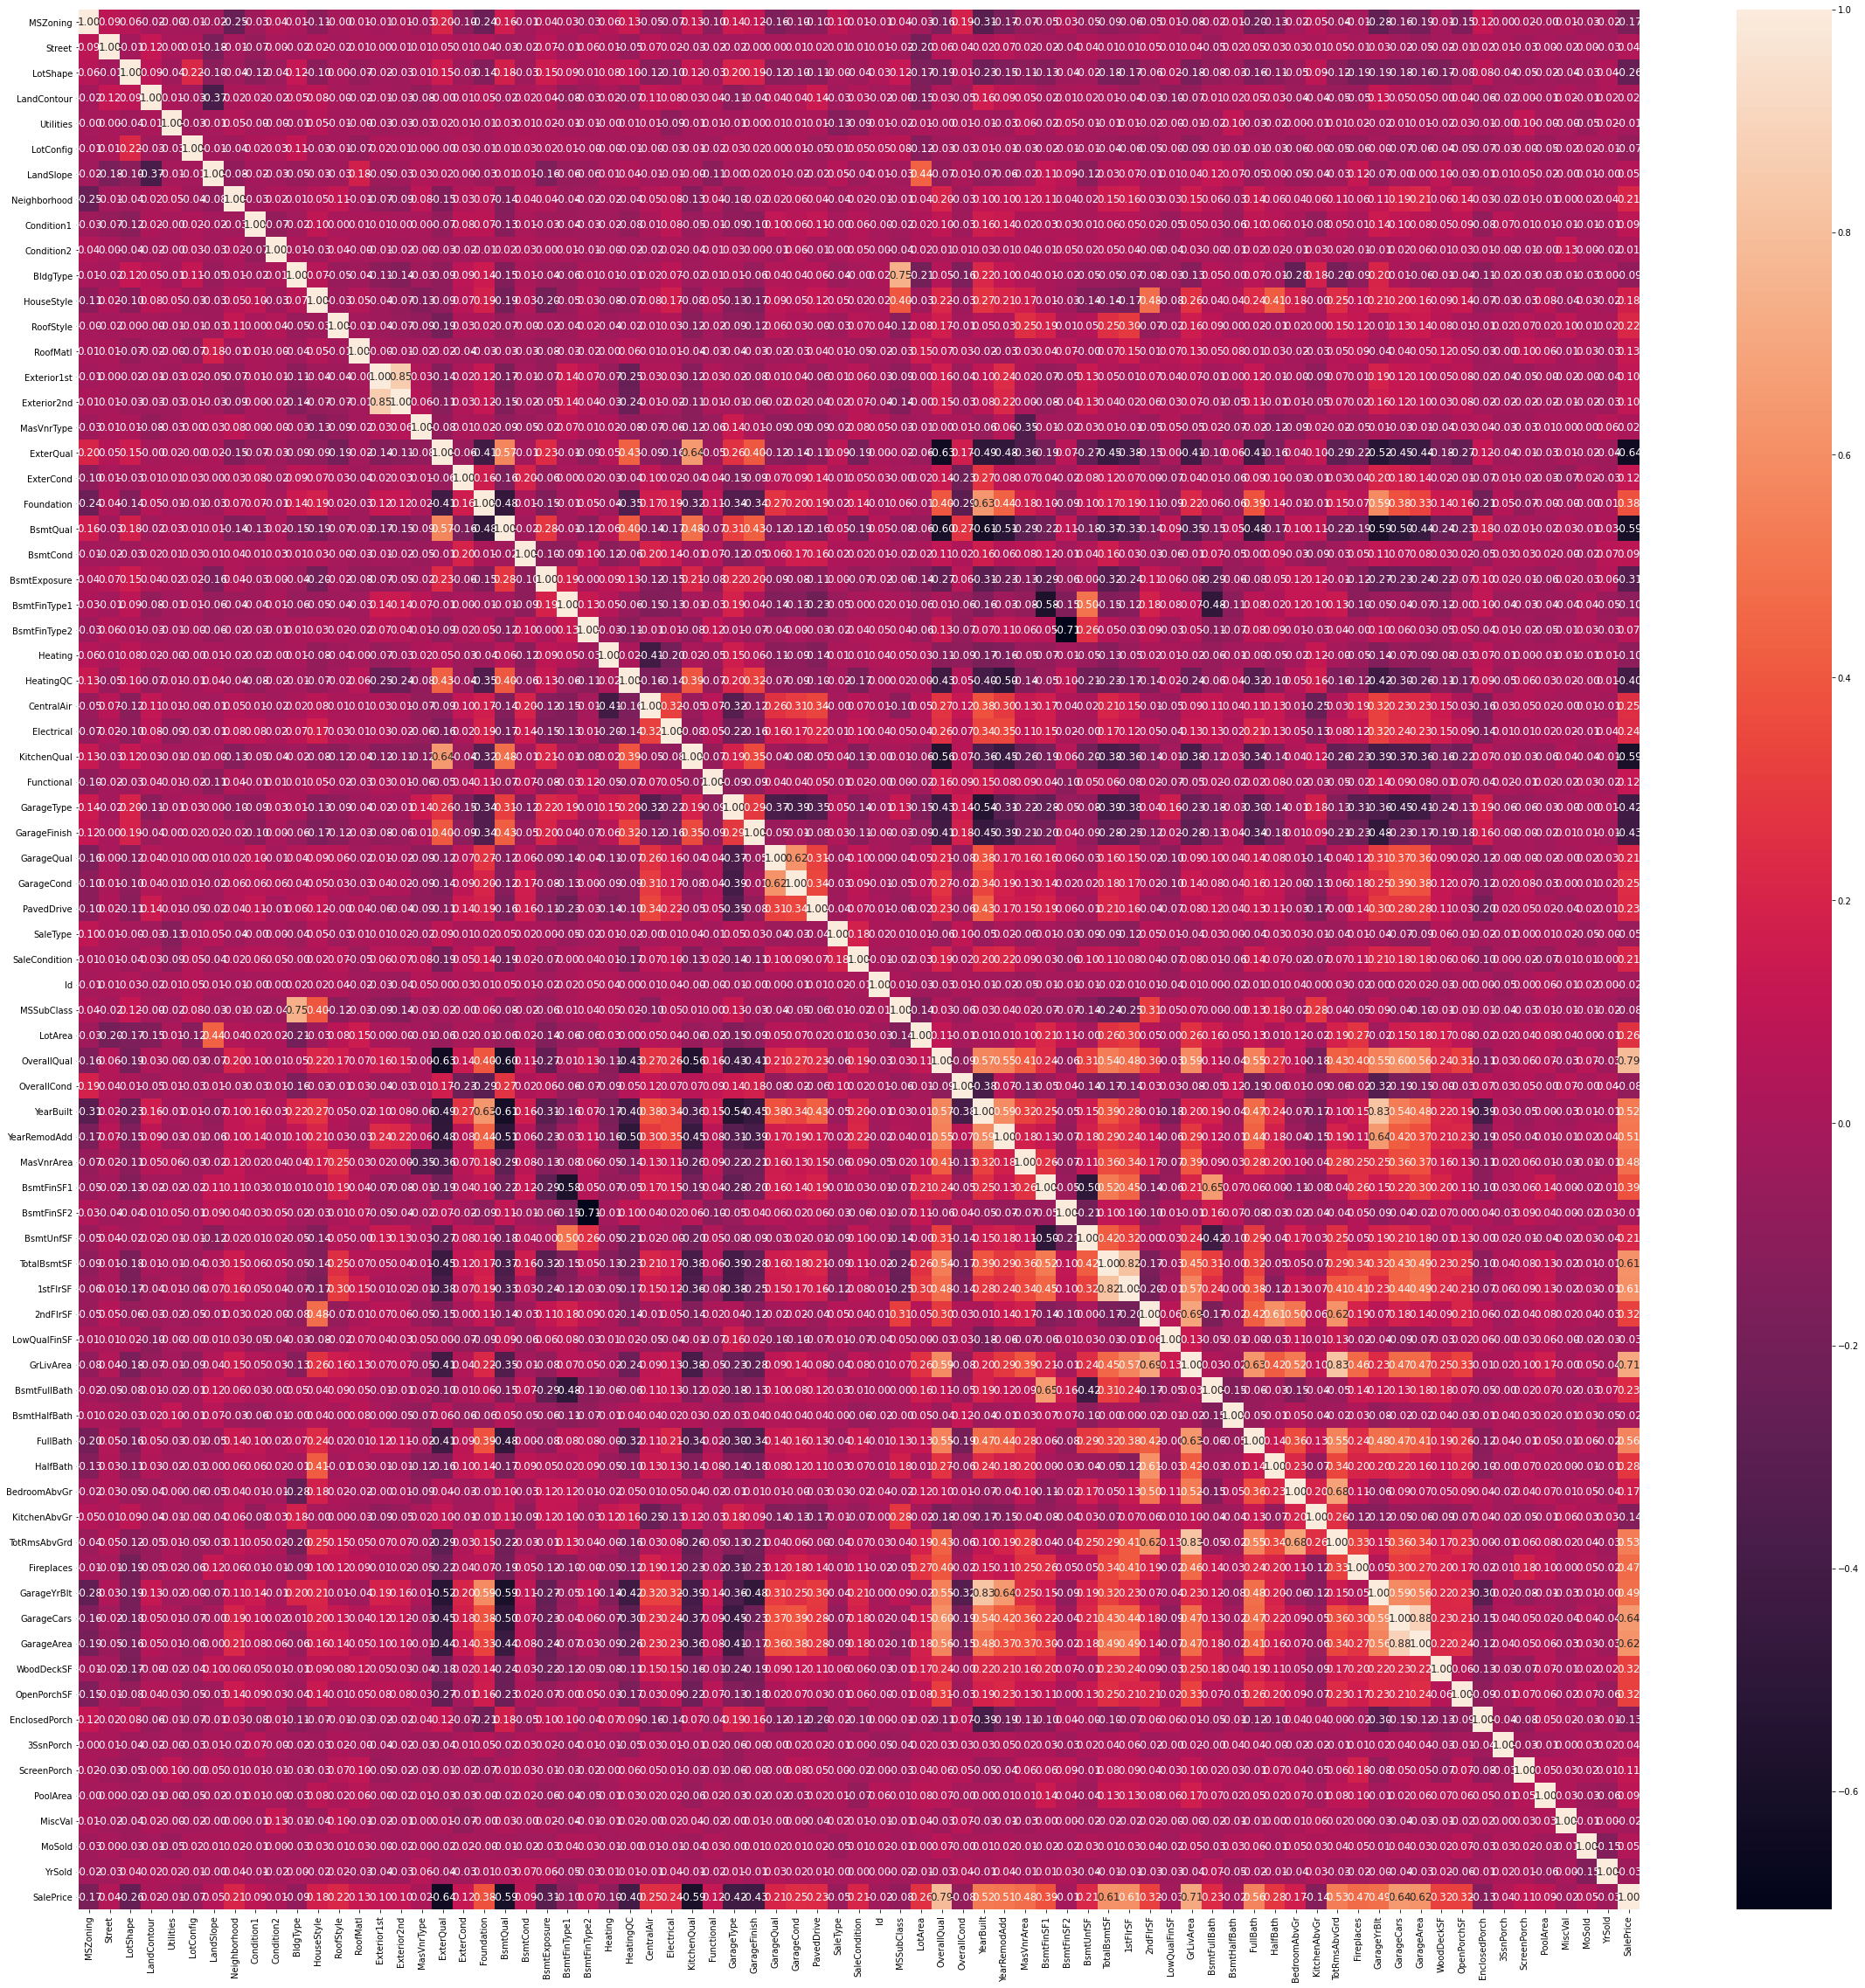

In [30]:
plt.figure(figsize=(40,40)) 
sns.heatmap(df_concat.corr(),annot_kws={'size': 12},fmt='.2f',annot=True)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


scaler = StandardScaler()



df_concat['MasVnrArea'] = df_concat['MasVnrArea'].fillna(0)
df_concat['GarageYrBlt'] = df_concat['GarageYrBlt'].fillna(0)

y = df_concat.iloc[:,-1:]
X = df_concat.iloc[:,0:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# #from sklearn.datasets import make_regression
# X, y = df_concat(n_features=4, n_informative=2,
#                        random_state=0, shuffle=False)
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
Y_pred = regr.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Y_pred, squared=False)

31383.90047998546

In [34]:
df_test = pd.read_csv("test.csv")

In [35]:
# Prediction_Values = regr.predict(df_test)


from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in df_test.columns:
  df_test[''+x+''] = le.fit_transform(df_test[''+x+''])
#  break
df_test = scaler.transform(df_test)



TypeError: ignored